In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("credit_risk_dataset.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [3]:
df = df.sort_values(by="loan_grade")
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
16290,24,39000,MORTGAGE,3.0,DEBTCONSOLIDATION,A,5600,5.42,0,0.14,N,4
22756,29,115000,RENT,5.0,HOMEIMPROVEMENT,A,7500,5.99,0,0.07,N,8
9564,21,62500,MORTGAGE,6.0,EDUCATION,A,13200,7.90,0,0.21,N,3
9565,23,62500,MORTGAGE,4.0,DEBTCONSOLIDATION,A,23525,7.90,0,0.38,N,3
22749,34,57912,MORTGAGE,7.0,VENTURE,A,5600,5.42,0,0.10,N,8
9569,22,62500,MORTGAGE,6.0,PERSONAL,A,10000,5.99,0,0.16,N,3
22748,27,57886,MORTGAGE,7.0,VENTURE,A,4000,7.90,0,0.07,N,9
9571,24,62500,MORTGAGE,2.0,VENTURE,A,6000,5.79,0,0.10,N,2
9572,26,40000,RENT,0.0,VENTURE,A,8200,6.62,0,0.20,N,4
22747,33,57800,MORTGAGE,12.0,MEDICAL,A,7000,6.99,0,0.12,N,6


In [4]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [5]:
df.shape

(32581, 12)

In [6]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : "Missing Values", 1 : "% of Total Values"})
    return mis_val_table_ren_columns
missing_values_table(df)


,Missing Values,% of Total Values
person_age,0,0.000000
person_income,0,0.000000
person_home_ownership,0,0.000000
person_emp_length,895,2.747000
loan_intent,0,0.000000
loan_grade,0,0.000000
loan_amnt,0,0.000000
loan_int_rate,3116,9.563856
loan_status,0,0.000000
loan_percent_income,0,0.000000


#### How to deal with missing value
In total there are 32,5K data entries, so our first choice is removing all the missing values from both "person_home_ownership" and "loan_int_rate" and our second choice is to use the mean of each column to replace the missing value. We will run the logistic regression model twice to see if the coeffients are significantly different. At this stage, we checked how many missing values from the two columns are in the same rows to see if we remove all the missing values, how many data entries are still available

In [7]:
rows_with_null_values = len(df.dropna(axis = 0, how = 'any'))
rows_with_null_values

28638

In [8]:
amount_of_null_values_per_row = df.isnull().sum(axis=1)
pd.Series(amount_of_null_values_per_row).value_counts()

0    28638
1     3875
2       68
dtype: int64

### Examine the variables and remove the outliers

In [9]:
# We would like to have a general overview if there is outlier in different variables
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### Visualise the relations between / among different varibales 

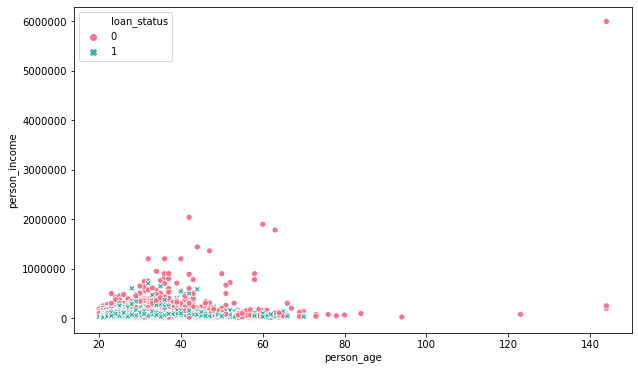

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
ax.ticklabel_format(style='plain')
sns.scatterplot(x="person_age", y="person_income", data=df, hue="loan_status", style="loan_status", palette="husl")

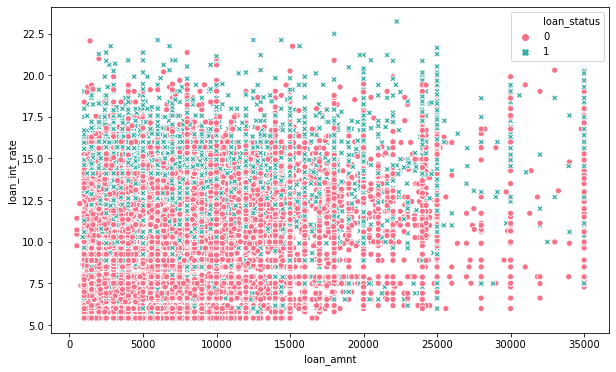

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="loan_amnt", y="loan_int_rate", data=df, hue="loan_status", style="loan_status", palette="husl")

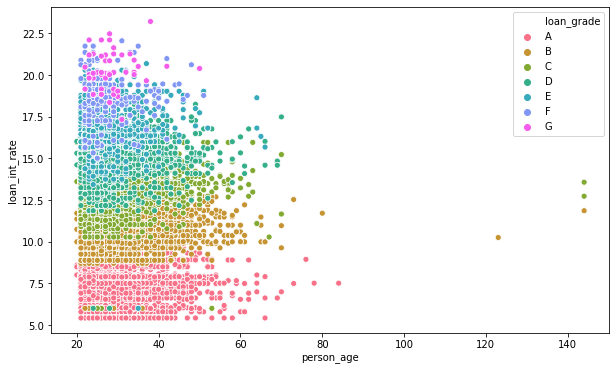

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="person_age", y="loan_int_rate", data=df, hue="loan_grade", palette="husl")

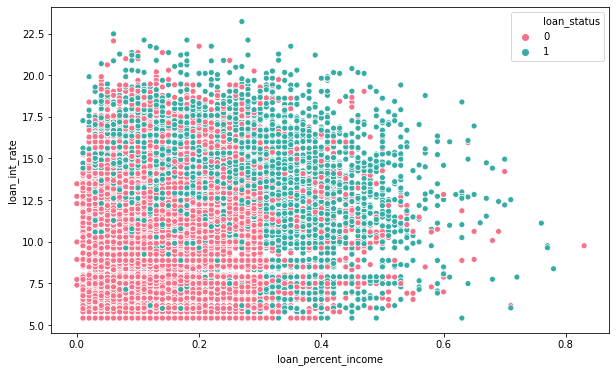

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="loan_percent_income", y="loan_int_rate", data=df, hue="loan_status", palette="husl")

In [14]:
data_non_default = df[(df["loan_status"]==0)]
data_default = df[(df["loan_status"]==1)]
data_non_default_groupby_grade = data_non_default.groupby("loan_grade").count().reset_index()
data_default_groupby_grade = data_default.groupby("loan_grade").count().reset_index()
data_non_default_groupby_grade

,loan_grade,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,A,9704,9704,9704,9380,9704,9704,8797,9704,9704,9704,9704
1,B,8750,8750,8750,8564,8750,8750,7867,8750,8750,8750,8750
2,C,5119,5119,5119,5038,5119,5119,4619,5119,5119,5119,5119
3,D,1485,1485,1485,1466,1485,1485,1343,1485,1485,1485,1485
4,E,343,343,343,341,343,343,310,343,343,343,343
5,F,71,71,71,70,71,71,64,71,71,71,71
6,G,1,1,1,1,1,1,1,1,1,1,1


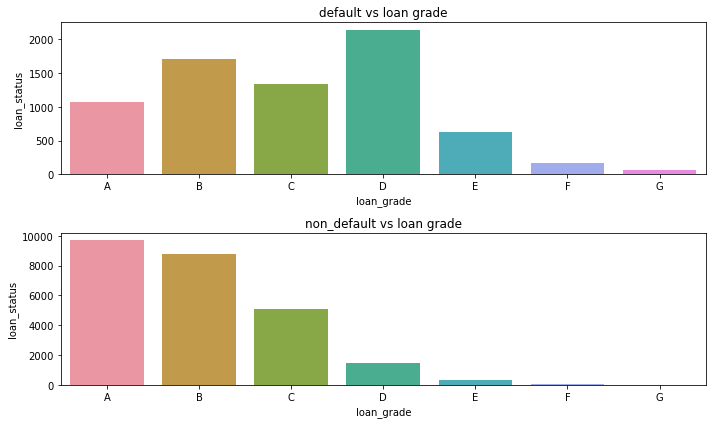

In [15]:
fig, axes=plt.subplots(2,1, figsize=(10,6))
sns.set_palette("magma")
sns.barplot(ax=axes[0],x="loan_grade", y="loan_status", data=data_default_groupby_grade)
axes[0].set_title("default vs loan grade")

sns.barplot(ax=axes[1], x="loan_grade", y="loan_status", data=data_non_default_groupby_grade)
axes[1].set_title("non_default vs loan grade")

plt.tight_layout()

In [16]:
data_non_default = df[(df["loan_status"]==0)]
data_default = df[(df["loan_status"]==1)]
data_non_default_groupby_grade = data_non_default.groupby("person_home_ownership").count().reset_index()
data_default_groupby_grade = data_default.groupby("person_home_ownership").count().reset_index()
data_non_default_groupby_grade

,person_home_ownership,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,MORTGAGE,11754,11754,11463,11754,11754,11754,10583,11754,11754,11754,11754
1,OTHER,74,74,74,74,74,74,67,74,74,74,74
2,OWN,2391,2391,2243,2391,2391,2391,2187,2391,2391,2391,2391
3,RENT,11254,11254,11080,11254,11254,11254,10164,11254,11254,11254,11254


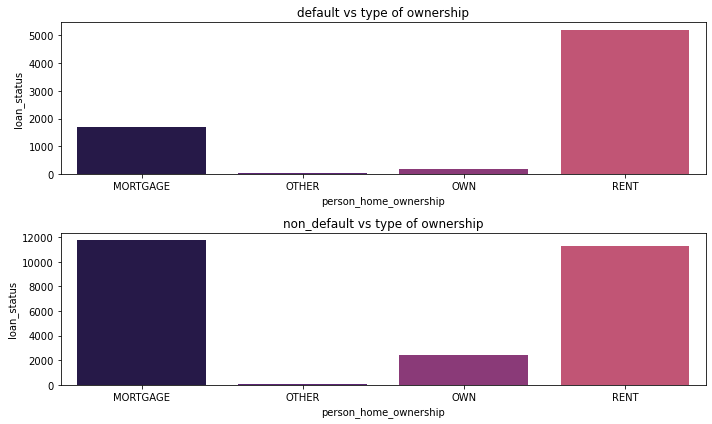

In [17]:
fig, axes=plt.subplots(2,1, figsize=(10,6))

sns.barplot(ax=axes[0],x="person_home_ownership", y="loan_status", data=data_default_groupby_grade)
axes[0].set_title("default vs type of ownership")

sns.barplot(ax=axes[1], x="person_home_ownership", y="loan_status", data=data_non_default_groupby_grade)
axes[1].set_title("non_default vs type of ownership")

plt.tight_layout()

In [18]:
data_non_default = df[(df["loan_status"]==0)]
data_default = df[(df["loan_status"]==1)]
data_non_default_groupby_grade = data_non_default.groupby("loan_intent").count().reset_index()
data_default_groupby_grade = data_default.groupby("loan_intent").count().reset_index()
data_non_default_groupby_grade

,loan_intent,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,DEBTCONSOLIDATION,3722,3722,3722,3627,3722,3722,3357,3722,3722,3722,3722
1,EDUCATION,5342,5342,5342,5224,5342,5342,4843,5342,5342,5342,5342
2,HOMEIMPROVEMENT,2664,2664,2664,2613,2664,2664,2427,2664,2664,2664,2664
3,MEDICAL,4450,4450,4450,4332,4450,4450,3980,4450,4450,4450,4450
4,PERSONAL,4423,4423,4423,4322,4423,4423,4004,4423,4423,4423,4423
5,VENTURE,4872,4872,4872,4742,4872,4872,4390,4872,4872,4872,4872


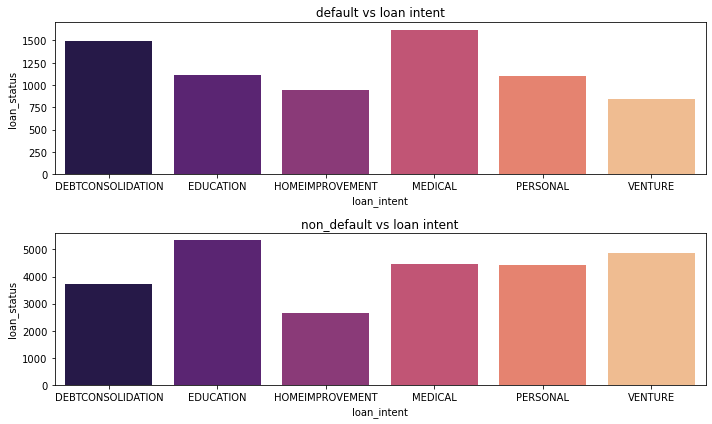

In [19]:
fig, axes=plt.subplots(2,1, figsize=(10,6))

sns.barplot(ax=axes[0],x="loan_intent", y="loan_status", data=data_default_groupby_grade)
axes[0].set_title("default vs loan intent")

sns.barplot(ax=axes[1], x="loan_intent", y="loan_status", data=data_non_default_groupby_grade)
axes[1].set_title("non_default vs loan intent")

plt.tight_layout()

In [20]:
# Print out graphs
'''fig = sns.barplot(x ='Highway MPG', y = 'Fuel Type', data = data, estimator = np.median, saturation = 0.9).get_figure()
fig.savefig('example.png')'''


"fig = sns.barplot(x ='Highway MPG', y = 'Fuel Type', data = data, estimator = np.median, saturation = 0.9).get_figure()\nfig.savefig('example.png')"